Aluno: Dogo Melo Delgado Azevedo

Email: dmda@cesar.school

# Importar Bibliotecas

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
import io


In [2]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression", path ='Salary_dataset.csv')

Using Colab cache for faster access to the 'salary-dataset-simple-linear-regression' dataset.


# EDA

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df = df.drop(columns=["Unnamed: 0"])

Text(0.5, 0, 'Salary')

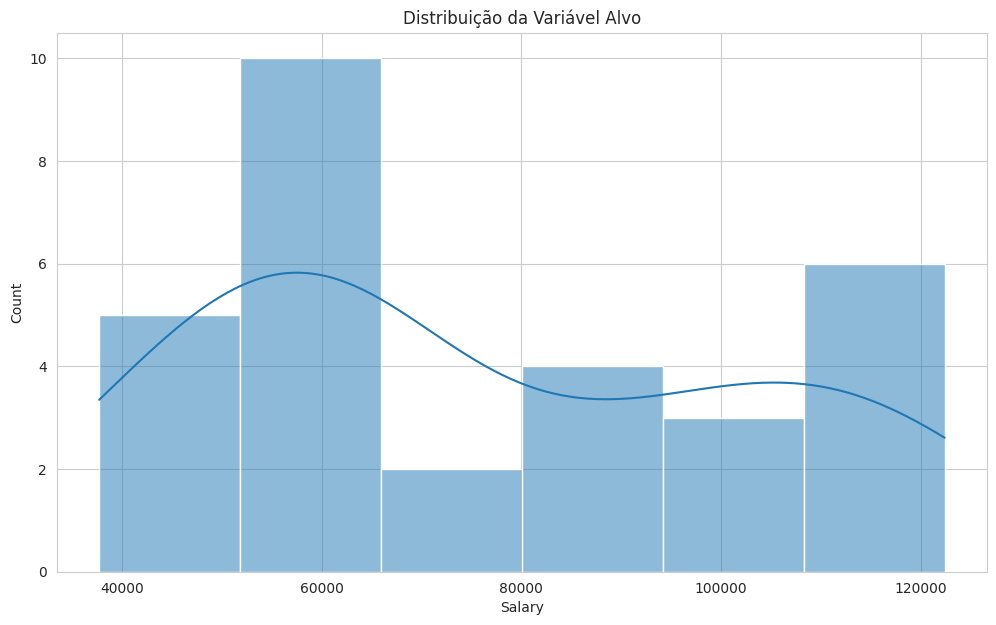

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(df['Salary'], kde=True, ax=ax)
ax.set_title('Distribuição da Variável Alvo')
ax.set_xlabel('Salary')

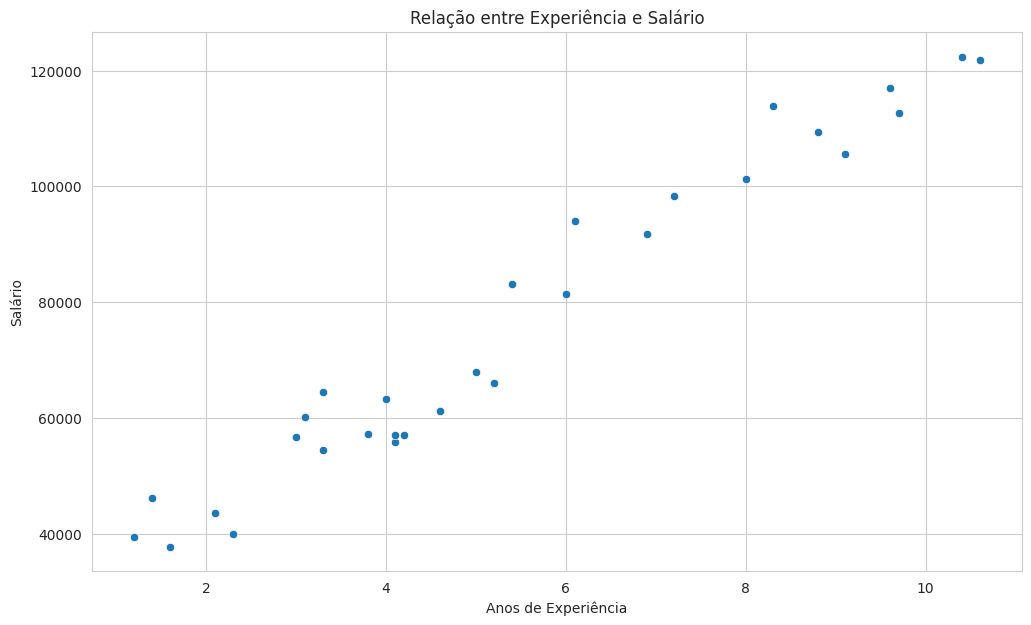

In [7]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Relação entre Experiência e Salário')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

In [8]:
print("Correlação entre as variáveis:")
print(df.corr(), "\n")

Correlação entre as variáveis:
                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000 



# Divisão Treino e Teste

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Salary']),
                                                    df['Salary'],
                                                    test_size=0.2,
                                                    random_state=42)

# Modelo de Regressão Linear

In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [43]:
print(reg.score(X_train, y_train))

0.9645401573418148


In [44]:
print(reg.score(X_test, y_test))

0.9024461774180497


In [45]:

rmse_treino = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_treino = r2_score(y_train, y_train_pred)

rmse_teste = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_teste = r2_score(y_test, y_test_pred)

print(f" RMSE Treino: {rmse_treino:.2f}")
print(f" R² Treino: {r2_treino:.4f}")
print(f" RMSE Teste: {rmse_teste:.2f}")
print(f" R² Teste: {r2_teste:.4f}")


 RMSE Treino: 5205.98
 R² Treino: 0.9645
 RMSE Teste: 7059.04
 R² Teste: 0.9024


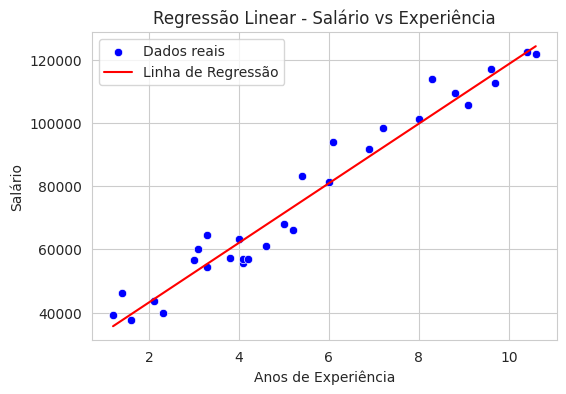

In [41]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue', label='Dados reais')
plt.plot(df['YearsExperience'], reg.predict(df[['YearsExperience']]),
         color='red', label='Linha de Regressão')
plt.title('Regressão Linear - Salário vs Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.show()